In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [4]:
import pandas as pd

dataset = pd.read_csv("/content/drive/MyDrive/Deep_learning/Churn_Modelling.csv")

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


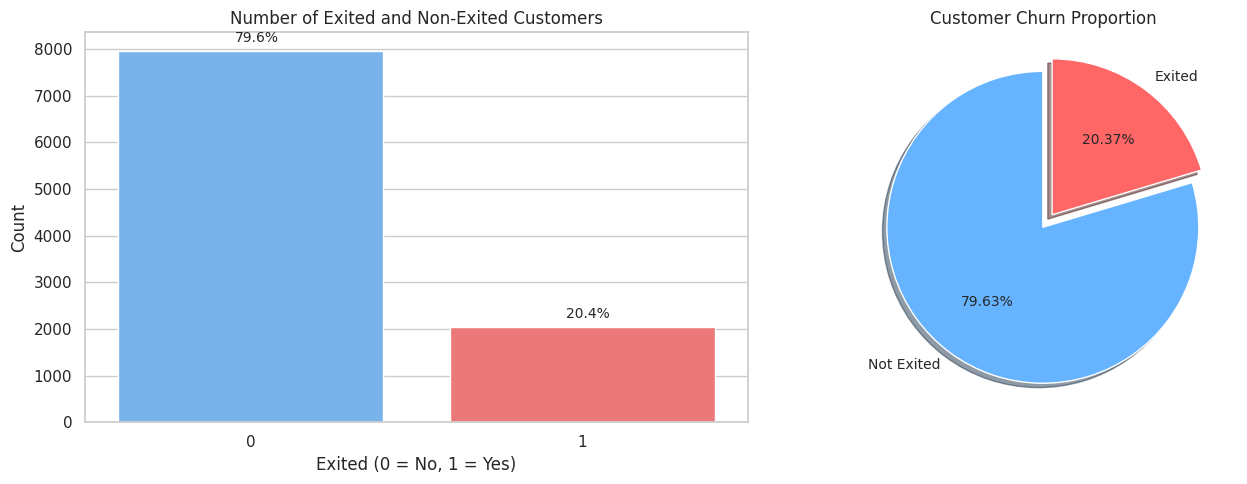

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1)

# Prepare data
labels = ["Not Exited", "Exited"]
sizes = dataset['Exited'].value_counts()
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)  # highlight the churn slice

# Plot
plt.figure(figsize=(14, 5))

# Bar Chart
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Exited', data=dataset, hue='Exited', palette=colors, legend=False)
plt.title("Number of Exited and Non-Exited Customers", fontsize=12)
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Add percentage labels
total = len(dataset)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2.0 - 0.05, height + 200), fontsize=10)

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90,
        shadow=True, colors=colors, explode=explode, textprops={'fontsize': 10})
plt.title("Customer Churn Proportion", fontsize=12)

# Final layout
plt.tight_layout()
plt.show()


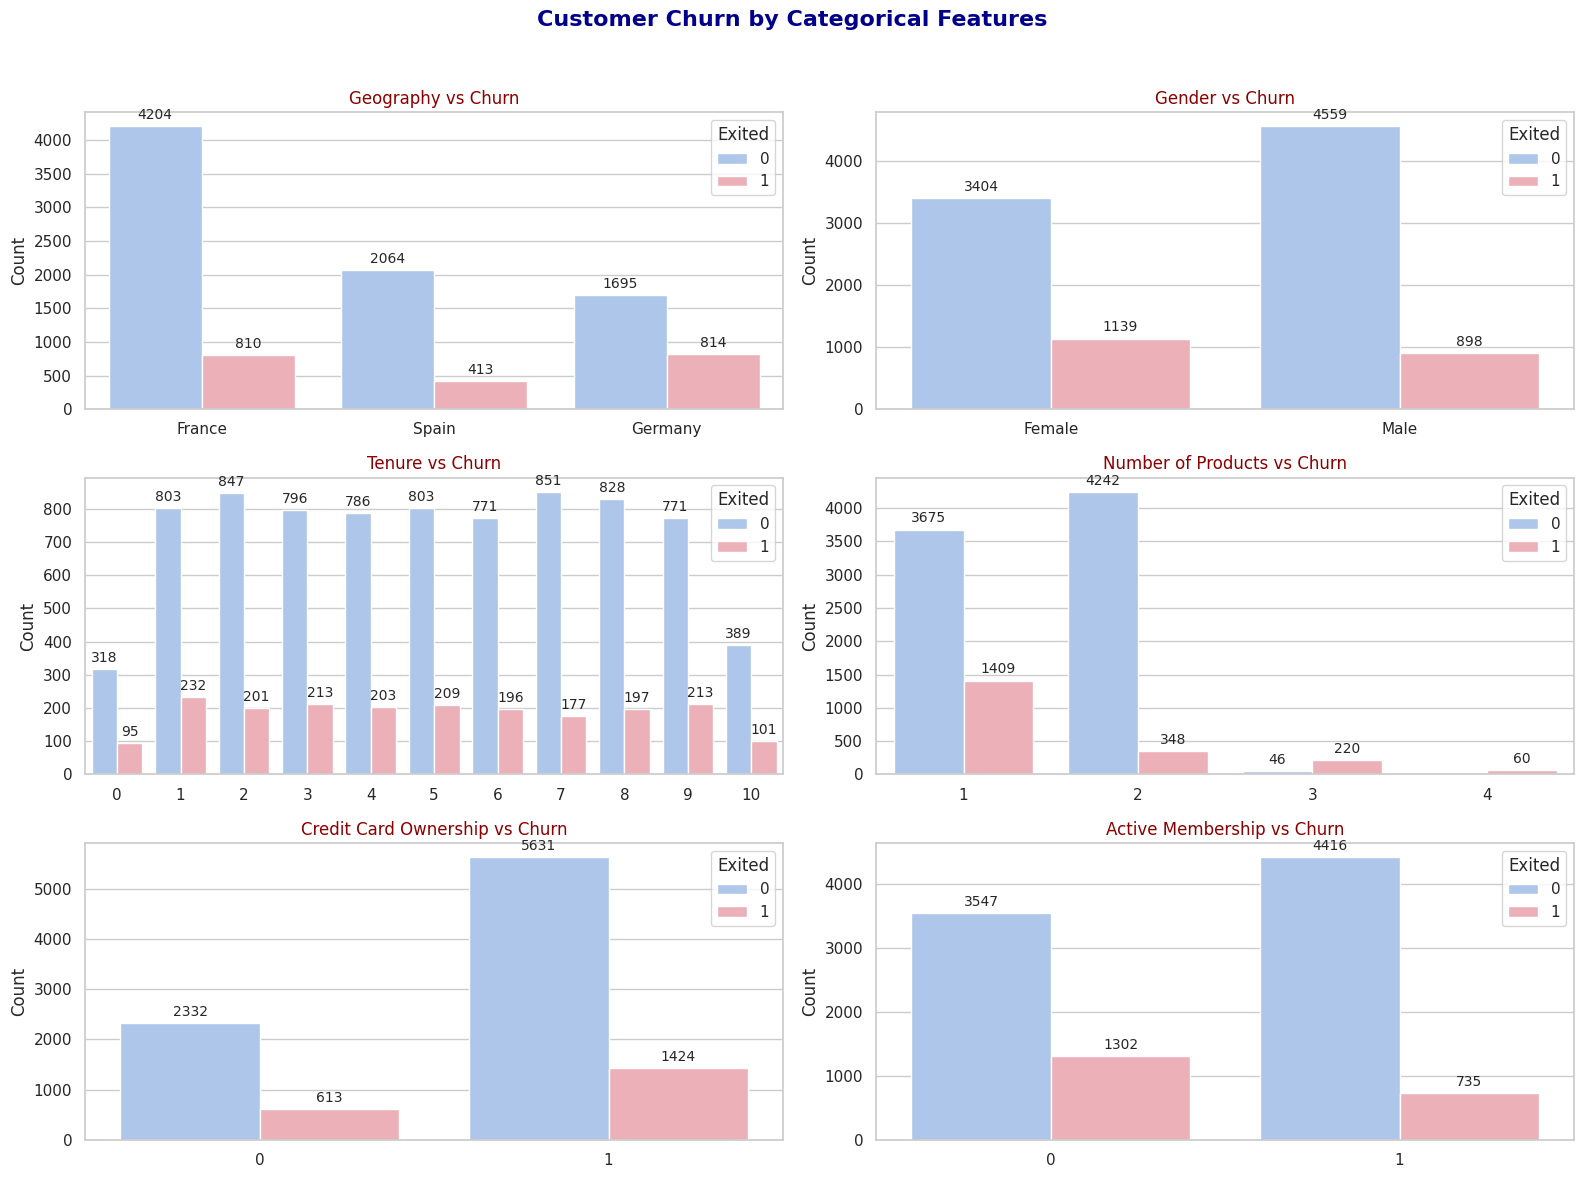

In [24]:
# Set visual style
sns.set(style="whitegrid", font_scale=1)

# Define only two colors for the 'Exited' hue
colors = ['#a3c4f3', '#f6a6b2']  # light blue for Not Exited, light red for Exited

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle("Customer Churn by Categorical Features", fontsize=16, color='darkblue', weight='bold')

# Plot each categorical feature
sns.countplot(x='Geography', hue='Exited', data=dataset, ax=ax[0][0], palette=colors)
sns.countplot(x='Gender', hue='Exited', data=dataset, ax=ax[0][1], palette=colors)
sns.countplot(x='Tenure', hue='Exited', data=dataset, ax=ax[1][0], palette=colors)
sns.countplot(x='NumOfProducts', hue='Exited', data=dataset, ax=ax[1][1], palette=colors)
sns.countplot(x='HasCrCard', hue='Exited', data=dataset, ax=ax[2][0], palette=colors)
sns.countplot(x='IsActiveMember', hue='Exited', data=dataset, ax=ax[2][1], palette=colors)

# Titles and bar labels
titles = [
    'Geography vs Churn',
    'Gender vs Churn',
    'Tenure vs Churn',
    'Number of Products vs Churn',
    'Credit Card Ownership vs Churn',
    'Active Membership vs Churn'
]

for axes, title in zip(ax.flat, titles):
    axes.set_title(title, fontsize=12, color='darkred')
    axes.set_xlabel("")
    axes.set_ylabel("Count")
    for container in axes.containers:
        axes.bar_label(container, fmt='%d', fontsize=10, padding=3)

# Final layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


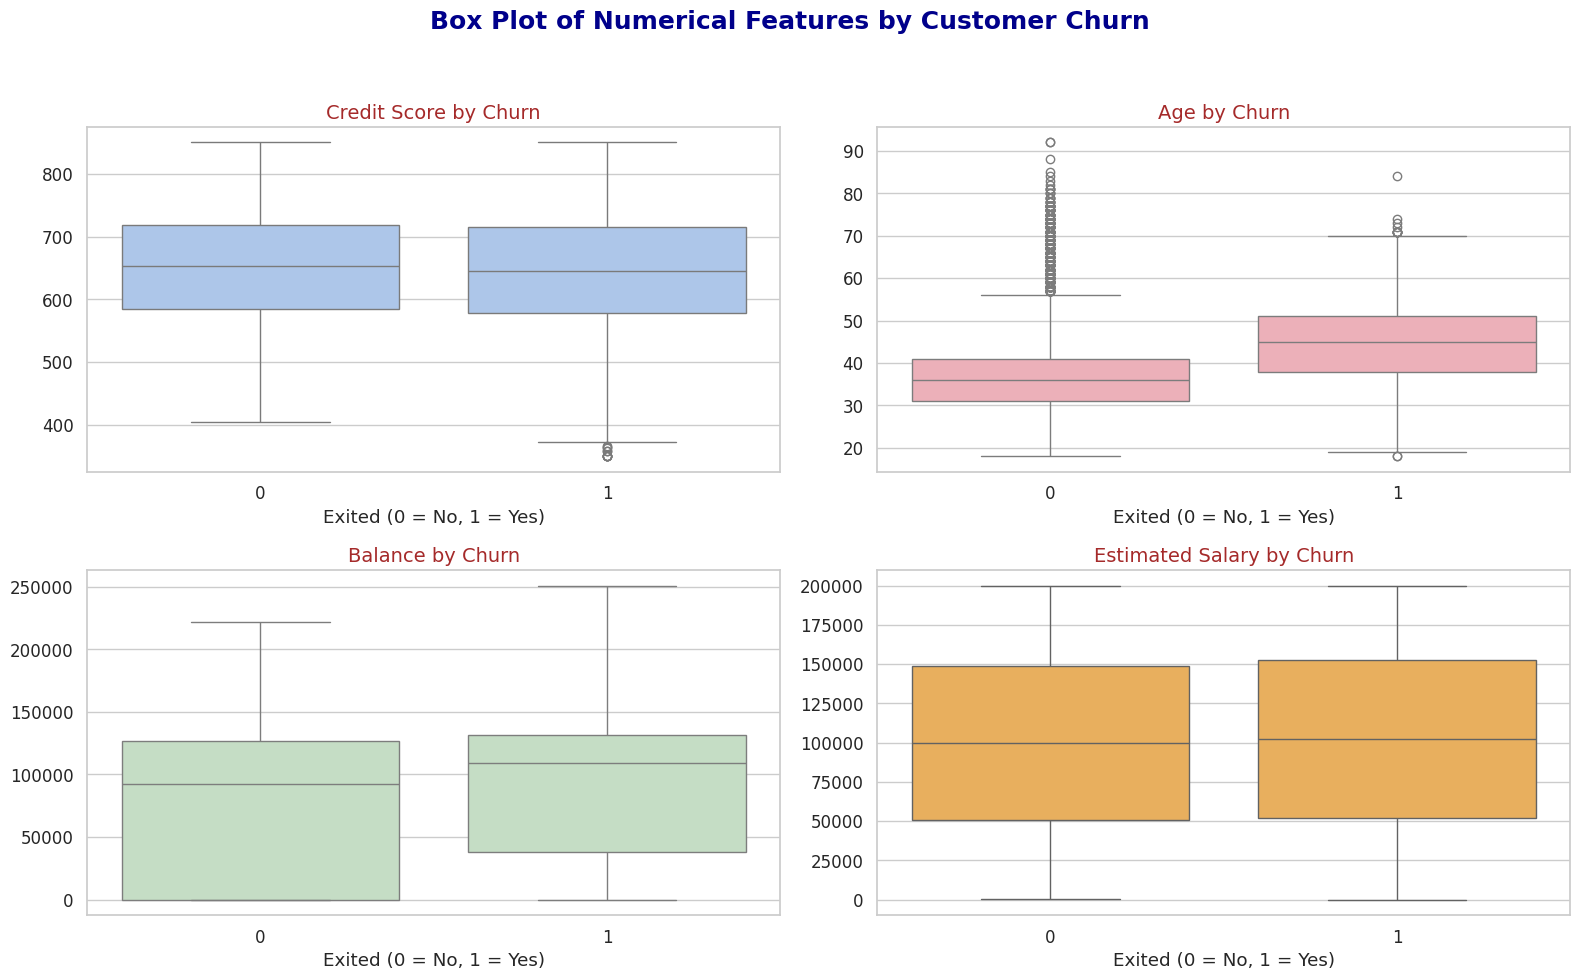

In [27]:
# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Define figure and axes
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Box Plot of Numerical Features by Customer Churn", fontsize=18, color='darkblue', weight='bold')

# Single color per plot — no warning
sns.boxplot(x='Exited', y='CreditScore', data=dataset, ax=ax[0][0], color='#a3c4f3')
sns.boxplot(x='Exited', y='Age', data=dataset, ax=ax[0][1], color='#f6a6b2')
sns.boxplot(x='Exited', y='Balance', data=dataset, ax=ax[1][0], color='#c1e1c1')
sns.boxplot(x='Exited', y='EstimatedSalary', data=dataset, ax=ax[1][1], color='#ffb347')

# Set axis titles
titles = ['Credit Score by Churn', 'Age by Churn', 'Balance by Churn', 'Estimated Salary by Churn']
for axes, title in zip(ax.flat, titles):
    axes.set_title(title, fontsize=14, color='brown')
    axes.set_xlabel("Exited (0 = No, 1 = Yes)")
    axes.set_ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [28]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [29]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [30]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [31]:
Geography = pd.get_dummies(X["Geography"], drop_first=True)
Gender = pd.get_dummies(X["Gender"], drop_first=True)

In [32]:
X = X.drop(["Geography", "Gender"], axis=1)

In [33]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [34]:
X = pd.concat([X, Geography, Gender], axis=1)

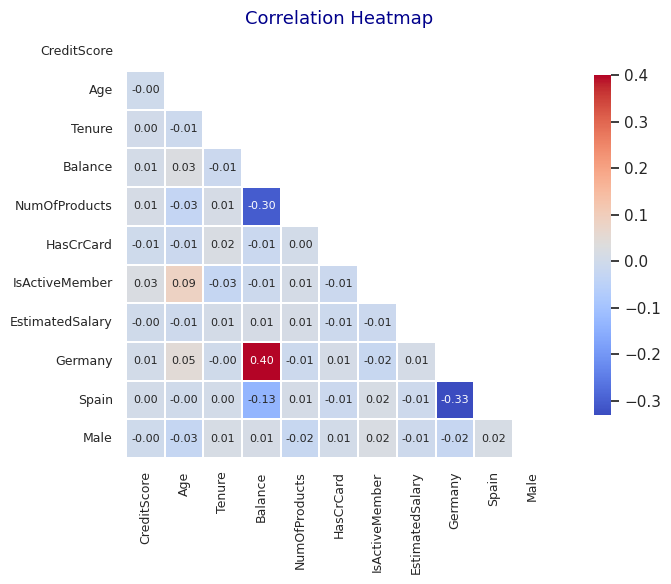

In [42]:
import numpy as np

# Compute correlation matrix
corr_matrix = X.corr()

# Step 3: Plot heatmap with smaller size and fonts
plt.figure(figsize=(9, 6))  # Smaller width and height
sns.set(style="white")

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.3,
    annot_kws={'size': 8},       # Smaller font for annotations
    cbar_kws={"shrink": 0.8}
)

# Smaller title font
plt.title("Correlation Heatmap", fontsize=13, color='darkblue')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
#feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [77]:
# Initialize the ANN
classifier = Sequential()

# Adding Input layer (best practice)
classifier.add(Input(shape=(11,)))

# Adding the first hidden layer
classifier.add(Dense(units=7, activation="relu"))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dropout(0.3))

# Adding the output layer
classifier.add(Dense(1, activation="sigmoid"))

# Compile the ANN
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [78]:
classifier.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

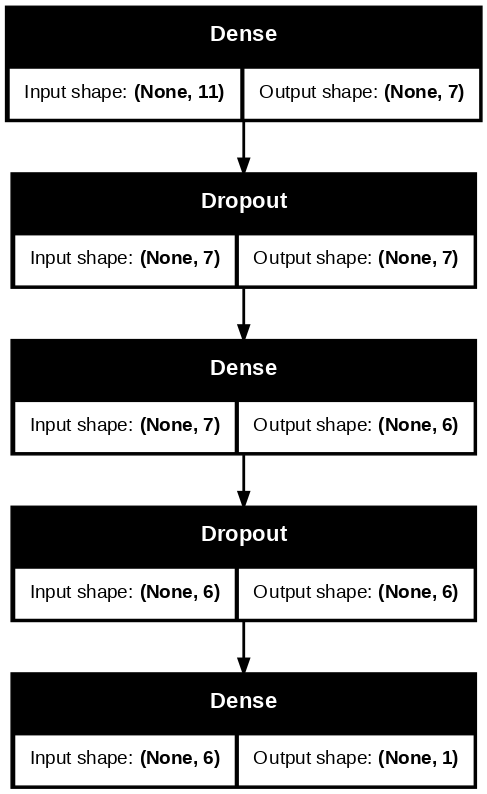

In [79]:
from tensorflow.keras.utils import plot_model

plot_model(
    classifier,
    to_file='model_plot.png',
    show_shapes=True,
    # show_layer_names=True,
    dpi=100,                # Lower DPI for smaller image
    # rankdir='TB'            # TB = top to bottom, LR = left to right
)

In [80]:
## Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [81]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4971 - loss: 0.8269 - val_accuracy: 0.7955 - val_loss: 0.5321
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7874 - loss: 0.5426 - val_accuracy: 0.7955 - val_loss: 0.4887
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7933 - loss: 0.5133 - val_accuracy: 0.7955 - val_loss: 0.4639
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7968 - loss: 0.4872 - val_accuracy: 0.7974 - val_loss: 0.4467
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8052 - loss: 0.4682 - val_accuracy: 0.8046 - val_loss: 0.4345
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7954 - loss: 0.4641 - val_accuracy: 0.8046 - val_loss: 0.4280
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8056 - loss: 0.4470 - val_accuracy: 0.8145 - val_loss: 0.4204
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8019 - loss: 0.4606 - val_acc

In [82]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

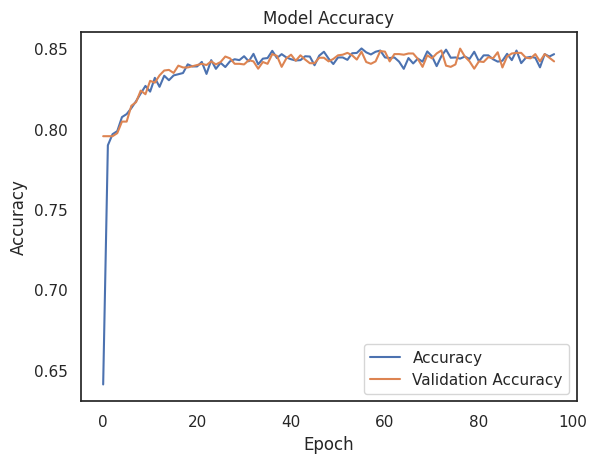

In [83]:
import matplotlib.pyplot as plot

plot.plot(model_history.history["accuracy"])
plot.plot(model_history.history["val_accuracy"])
plot.title("Model Accuracy")
plot.ylabel("Accuracy")
plot.xlabel("Epoch")
plot.legend(["Accuracy", "Validation Accuracy"])
plot.show()

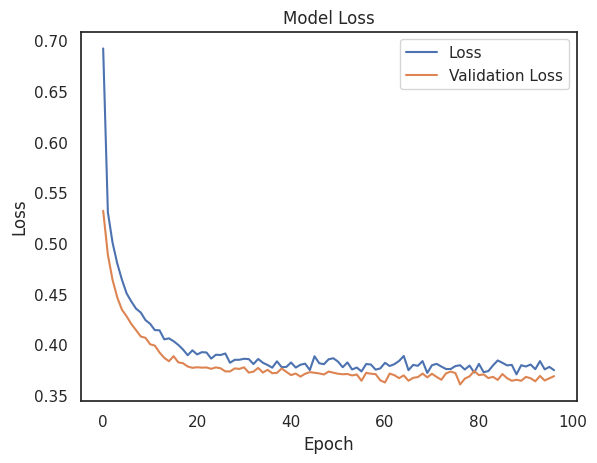

In [84]:
plot.plot(model_history.history["loss"])
plot.plot(model_history.history["val_loss"])
plot.title("Model Loss")
plot.ylabel("Loss")
plot.xlabel("Epoch")
plot.legend(["Loss", "Validation Loss"])

In [85]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [86]:
# prompt: calculate the score fo rthe training data also

score = classifier.evaluate(X_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1])

score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train score: 0.3575565814971924
Train accuracy: 0.8475000262260437
Test score: 0.3529742956161499
Test accuracy: 0.8539999723434448


In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1581,   14],
       [ 278,  127]])

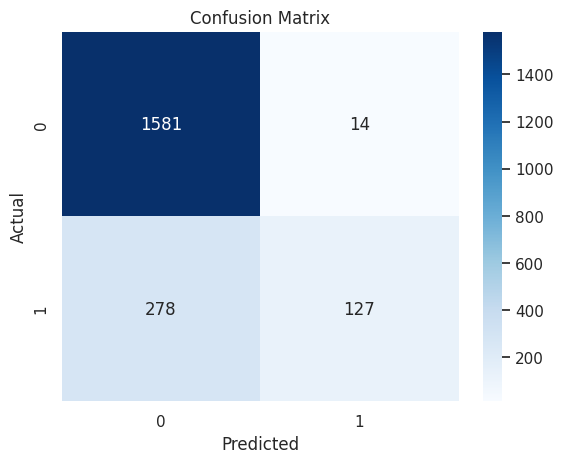

In [88]:
#plot the confusion matrix

import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plot.xlabel("Predicted")
plot.ylabel("Actual")
plot.title("Confusion Matrix")
plot.show()

In [89]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1595
           1       0.90      0.31      0.47       405

    accuracy                           0.85      2000
   macro avg       0.88      0.65      0.69      2000
weighted avg       0.86      0.85      0.82      2000

